In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

##############  OFFLINE  ##############
plotly.offline.init_notebook_mode(connected=True)
#to plot offline: ##plotly.offline.iplot##

##############  ONLINE  ##############
#plotly.tools.set_credentials_file(username='arnaurovira23', api_key='7y46ugRJ8Rl6XCkCwBGM')
#to plot online: ##py.iplot##
import plotly.plotly as py

# LOAD DATA

##### train dataset

In [135]:
#Load train dataset
df_train = pd.read_csv('train.csv').sample(frac=1, random_state = 20)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S


In [136]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
#Shape of train dataset
num_train = df_train.shape[0]
print(num_train)

891


In [138]:
features_all = df_train.columns.tolist()
print(features_all)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [139]:
features_int = ['PassengerId','Pclass','Age','SibSp','Parch','Fare']
print(features_int)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [140]:
features_obj = ['Name','Sex','Ticket','Cabin','Embarked']
print(features_obj)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [141]:
#df_train.isnull().sum().sum()
print(f"How many NaN values are in df_train dataset? {df_train.isnull().sum().sum()}")

How many NaN values are in df_train dataset? 866


In [142]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 347 to 355
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


##### test dataset

In [144]:
#Load test dataset
df_test = pd.read_csv('test.csv').sample(frac=1, random_state = 10)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S
154,1046,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
100,992,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,C116,C
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,NaN,S


In [145]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [146]:
df_test.isnull().sum().sum()
print(f"How many NaN values are in df_train dataset? {df_test.isnull().sum().sum()}")

How many NaN values are in df_train dataset? 414


In [147]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [148]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 362 to 265
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [149]:
#Shape of test dataset
num_test = df_test.shape[0]
print(num_test)

418


In [150]:
#histograms of train vs test dels int

def compare_dist(ax, feature, i=0):
    sns.kdeplot(df_train[feature], label="train", ax=ax)
    sns.kdeplot(df_test[feature], label="test", ax=ax)


def numeric_tile(plot_func):
    fig, axs = plt.subplots(1, 5, figsize=(24, 5))
    axs = axs.flatten()
    
    for i, (ax, col) in enumerate(zip(axs, features_int)):
        plot_func(ax, col, i)
        ax.set_title(col)
        sns.set(font_scale=1.3) 
        sns.set_style("ticks")
        ax.legend(frameon=False)
    plt.tight_layout()

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



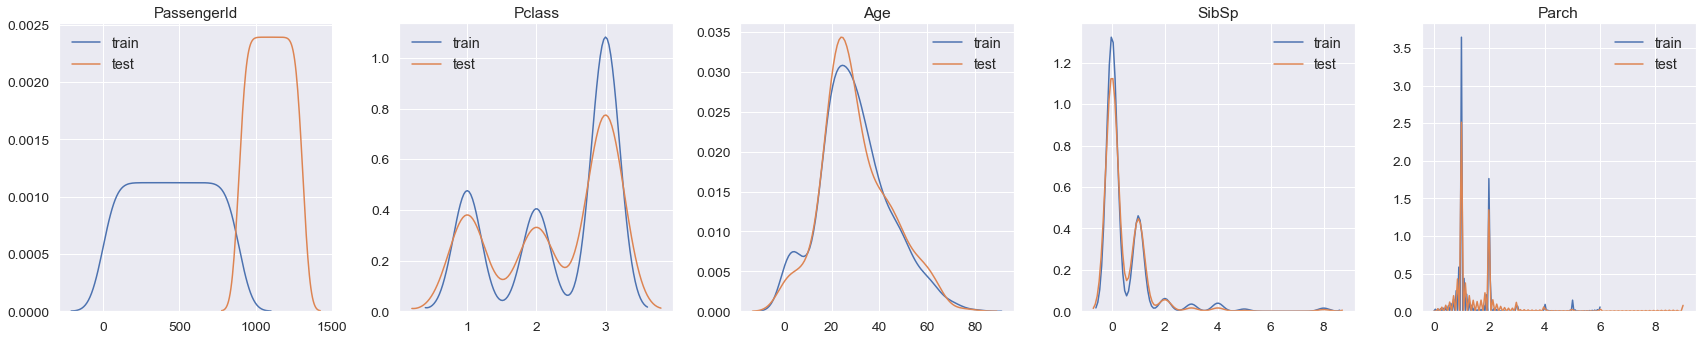

In [151]:
numeric_tile(compare_dist)

# EXPLORATORY DATA ANALYSIS

In [152]:
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
combine = [df_train, df_test]
df_train.shape, df_test.shape

((891, 11), (418, 10))

#### Analyze class balance

In [153]:
survived = np.sort(df_train['Survived'].unique())

In [154]:
#count number of Cover_Type == TARGET on train dataset
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Veiem que hi han més morts que supervivents

### Visualize histogram

In [155]:
feature = 'Age'
trace = []
group_labels = []

for i in np.sort(df_train['Survived'].unique())[::-1]:
    trace.append(go.Histogram(x = df_train[df_train['Survived']==i][feature].dropna(),\
                              opacity = 0.75, nbinsx = 25,name = f"Survived {int(i)}"))

layout = go.Layout(barmode='overlay', title = f"Distplot of {feature}")
fig = go.Figure(data=trace, layout=layout)

# Plot!
plotly.offline.iplot(fig)

In [156]:
feature = 'Pclass'
trace = []
group_labels = []

for i in np.sort(df_train['Survived'].unique())[::-1]:
    trace.append(go.Bar(x = np.sort(df_train[df_train['Survived']==i][feature].unique()),\
                        y = df_train[df_train['Survived']==i][feature].value_counts().sort_index(),\
                        opacity = 0.75,name = f"Survived {int(i)}"))

layout = go.Layout(barmode='group', title = f"Barplot of {feature}")
fig = go.Figure(data=trace, layout=layout)

# Plot!
plotly.offline.iplot(fig)

In [157]:
def compare_dist(ax, features_int, i=0):
    for surv in df_train['Survived'].unique():
        sns.kdeplot(df_train[df_train['Survived']==surv][features_int].dropna(), label = f"Survived {surv}", ax=ax)
def numeric_tile(plot_func):
    fig, axs = plt.subplots(1, 5, figsize=(50, 12))
    axs = axs.flatten()
    
    for i, (ax, col) in enumerate(zip(axs, features_int)):
        plot_func(ax, col, i)
        ax.set_title(col)
        sns.set(font_scale=3) 
        sns.set_style("ticks")
        ax.legend(frameon=False)
    plt.tight_layout()

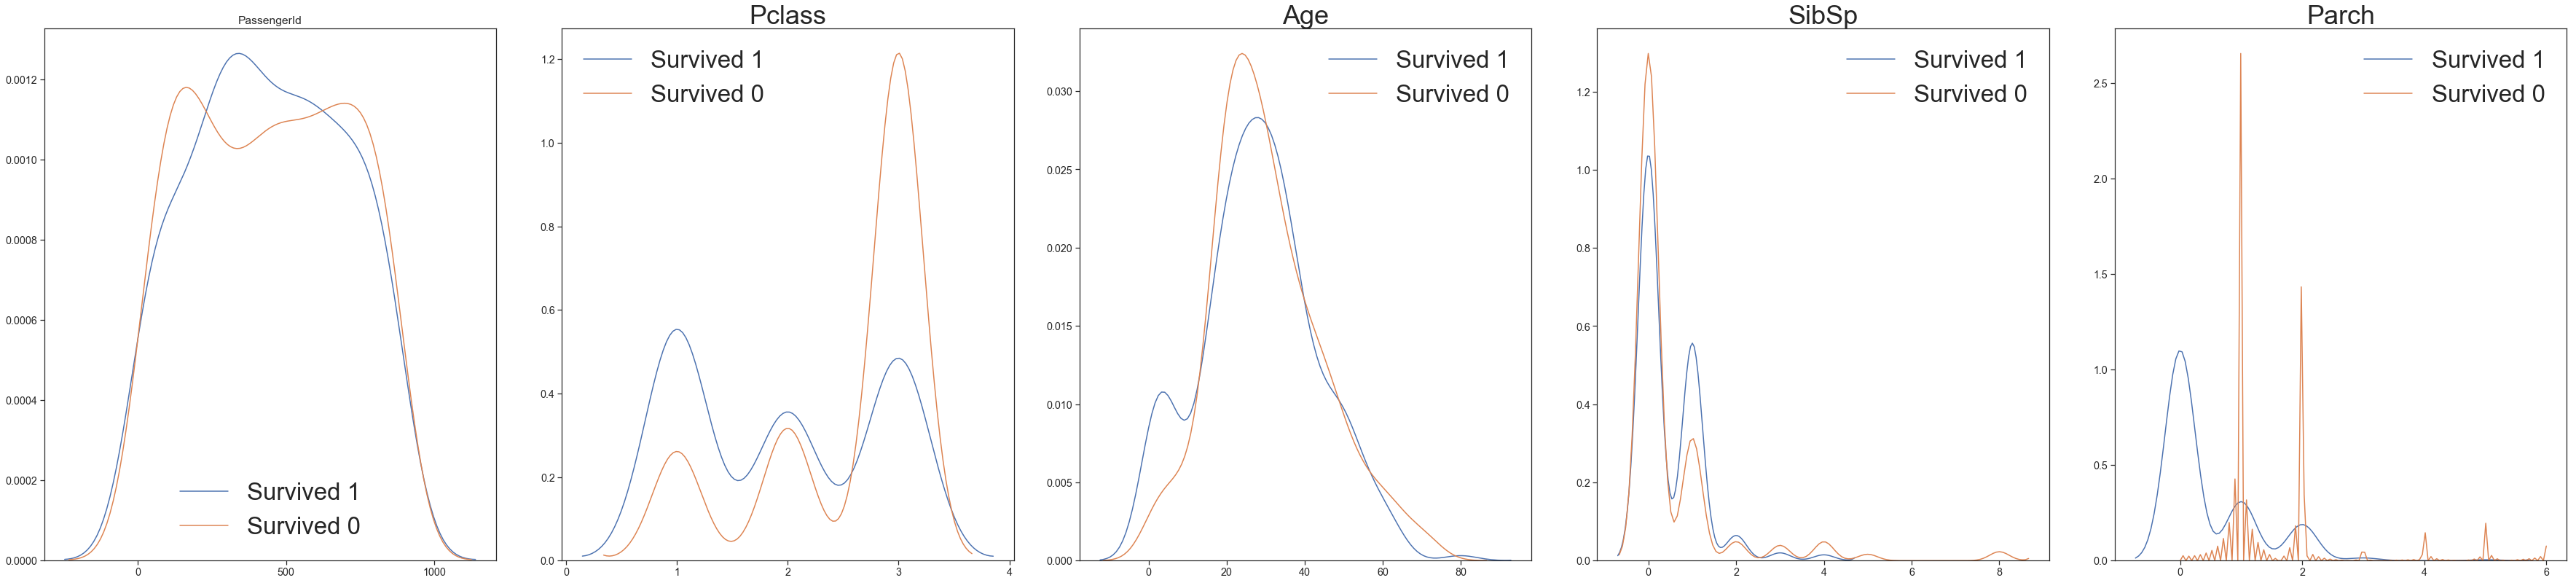

In [158]:
numeric_tile(compare_dist)

In [159]:
df_train[['Pclass','Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [160]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [161]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [162]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## Outliers

In [163]:
Q1 = df_train[features_int].quantile(0.25)
Q3 = df_train[features_int].quantile(0.75)
IQR = Q3 - Q1

out_tm = ((df_train[features_int] < (Q1 - 1.5 * IQR)) | (df_train[features_int] > (Q3 + 1.5 * IQR)))
outliers_iqr = pd.DataFrame(data={'outliers_IQR_count':out_tm.sum(),
                                  'outliers_IQR_%':100*out_tm.sum()/num_train})

outliers_iqr = outliers_iqr.sort_values(by='outliers_IQR_count',ascending=False)

In [164]:
outliers_iqr

,outliers_IQR_count,outliers_IQR_%
Parch,213,23.905724
Fare,116,13.019080
SibSp,46,5.162738
Age,11,1.234568
PassengerId,0,0.000000
Pclass,0,0.000000


In [165]:
trace = []
group_labels = []

trace = [go.Bar(y = outliers_iqr.index, x = outliers_iqr['outliers_IQR_count'],
               marker=dict(color='maroon',line=dict(color='black',width=1)),orientation ='h')]
    

layout = go.Layout(autosize=True,barmode='group',xaxis = dict(title = 'Total number of outliers',
                                                              tickfont=dict(size=10)), 
                   yaxis = dict(automargin=True,autorange = "reversed"),
                   title = 'Total Outliers IQR per feature in Train')
fig = go.Figure(data=trace, layout=layout)

plotly.offline.iplot(fig)

##  Netejar dataframes

Ens podem petar el ticket i cabina.

In [166]:
for dataset in combine:
    dataset.drop(['Ticket', 'Cabin'], axis=1, inplace = True)

Aqui codifiquem els Embarked

S = 0
C = 1
Q = 2


In [167]:
for dataset in combine:
    dataset.dropna(subset=['Embarked'], how='all', inplace = True)

In [168]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [169]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1}).astype(int)

In [170]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
347,348,1,3,1,NaN,1,0,16.1000,0
674,675,0,2,0,NaN,0,0,0.0000,0
791,792,0,2,0,16.0,0,0,26.0000,0
836,837,0,3,0,21.0,0,0,8.6625,0
56,57,1,2,1,21.0,0,0,10.5000,0


### fill NaN age

In [171]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [172]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5+0.5)*0.5
    
    for i in range (0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i)&(dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
347,348,1,3,1,21,1,0,16.1000,0
674,675,0,2,0,30,0,0,0.0000,0
791,792,0,2,0,16,0,0,26.0000,0
836,837,0,3,0,21,0,0,8.6625,0
56,57,1,2,1,21,0,0,10.5000,0


In [173]:
new_features = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

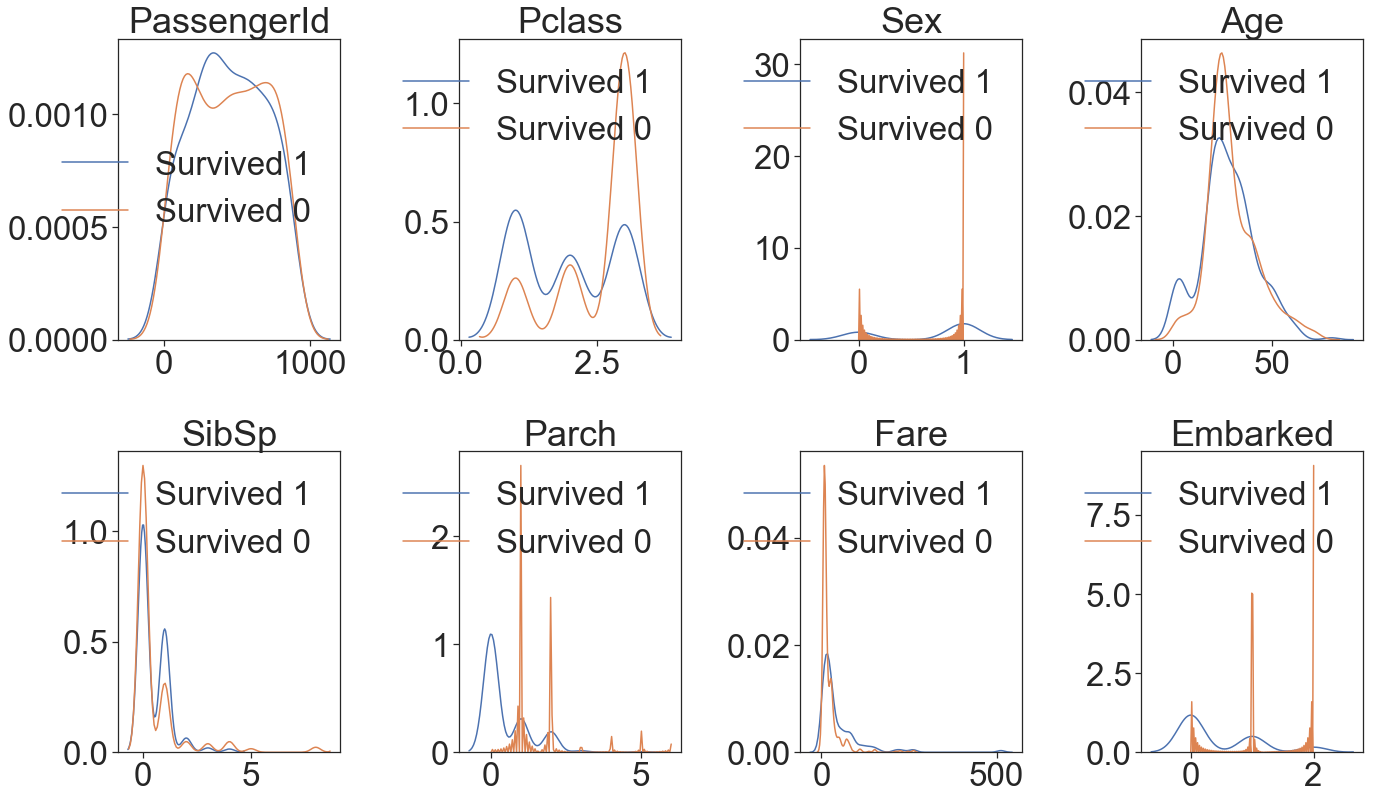

In [174]:
def compare_dist(ax, new_features, i=0):
    for surv in df_train['Survived'].unique():
        sns.kdeplot(df_train[df_train['Survived']==surv][new_features].dropna(), label = f"Survived {surv}", ax=ax)
def numeric_tile(plot_func):
    fig, axs = plt.subplots(2, 4, figsize=(20, 12))
    axs = axs.flatten()
    
    for i, (ax, col) in enumerate(zip(axs, new_features)):
        plot_func(ax, col, i)
        ax.set_title(col)
        sns.set(font_scale=3) 
        sns.set_style("ticks")
        ax.legend(frameon=False)
    plt.tight_layout()
    
numeric_tile(compare_dist)

## Correlation

In [175]:
features_int_new = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']

In [176]:
# Compute Pearson correlation for every pair of features
# Use only training data
pcorrs = pd.DataFrame(df_train[features_int_new].corr()['Survived'].sort_values()).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature','Survived': 'pcorr'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
    feature     pcorr
0    Pclass -0.335549
1       Age -0.065127
2     SibSp -0.034040
3     Parch  0.083151
4  Embarked  0.108669

Most positively correlated variables:
    feature     pcorr
3     Parch  0.083151
4  Embarked  0.108669
5      Fare  0.255290
6       Sex  0.541585
7  Survived  1.000000


In [177]:
# Compute Spearman correlation for every features
# Use only training data
from scipy.stats import spearmanr
feats = []
scorr = []
pvalues = []

# Iterate through each column
for feat in features_int_new:
 
    # Calculate spearman correlation
    scorr.append(spearmanr(df_train[feat], df_train['Survived']).correlation)
    pvalues.append(spearmanr(df_train[feat], df_train['Survived']).pvalue)

scorrs = pd.DataFrame({'feature': features_int_new, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
    feature     scorr        pvalue
0    Pclass -0.336917  4.890205e-25
2       Age -0.043671  1.932958e-01
3     SibSp  0.090944  6.659592e-03
6  Embarked  0.137869  3.713075e-05
4     Parch  0.140126  2.754779e-05

Most positive Spearman correlations:
    feature     scorr        pvalue
6  Embarked  0.137869  3.713075e-05
4     Parch  0.140126  2.754779e-05
5      Fare  0.320772  1.008254e-22
1       Sex  0.541585  6.682012e-69
7  Survived  1.000000  0.000000e+00


In [178]:
# Compute features for which PEarson and Spearman correlation differs the most
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff')

,feature,pcorr,scorr,pvalue,diff
2,SibSp,-0.034040,0.090944,6.659592e-03,-1.249840e-01
5,Fare,0.255290,0.320772,1.008254e-22,-6.548149e-02
3,Parch,0.083151,0.140126,2.754779e-05,-5.697551e-02
4,Embarked,0.108669,0.137869,3.713075e-05,-2.920034e-02
1,Age,-0.065127,-0.043671,1.932958e-01,-2.145605e-02
6,Sex,0.541585,0.541585,6.682012e-69,-4.662937e-15
7,Survived,1.000000,1.000000,0.000000e+00,0.000000e+00
0,Pclass,-0.335549,-0.336917,4.890205e-25,1.367825e-03


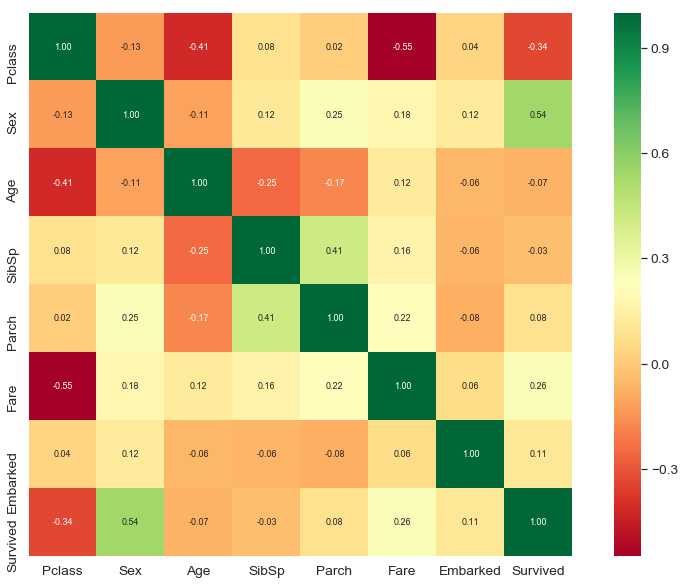

In [179]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.heatmap(df_train[features_int_new].corr(), square=True, cmap='RdYlGn',annot=True,annot_kws={'size': 9},fmt='.2f')

# MODEL AND PREDICTION
We first establish a baseline using Random Forest, and then we will move on to more sophisticated ML models and feature selection strategies

In [220]:
df_test.dropna(subset=['Fare'], how='all', inplace = True)

In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, make_scorer, f1_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

# Since the dataset is class-balanced, we can use macro averaging for the F1 scorer
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [223]:
# Extract training data and labels
train_set = df_train.drop(columns = ['Survived','PassengerId'])
test_set = df_test.drop(columns = ['PassengerId'])
test_ids = df_test['PassengerId'].values
train_labels = np.asarray(df_train['Survived'])
[num_examples,num_feat] = train_set.shape

# Submission base which is used for making submissions to the competition
submission_base = df_test[['PassengerId']].copy()

In [182]:
# Using stratified kfold cross validation
nfolds = 10
strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)

In [183]:
# Create pipeline for scaling
features = train_set.columns.tolist()
pipeline = Pipeline([('scaler', MinMaxScaler())])
# pipeline = Pipeline([('scaler', StandardScaler())])

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [184]:
# Routine to plot feature importances
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 10.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of x will show the most important features needed to reach 100*x% of cumulative importance
    
    """    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
        
    # Bar plot of n most important features
    trace0 = go.Bar(
                    y=df.loc[:n,'feature'],
                    x=df.loc[:n,'importance_normalized'],
                    marker=dict(
                        color='rgba(50, 171, 96, 0.6)',
                        line=dict(
                            color='rgba(50, 171, 96, 1.0)',
                            width=1),
                    ), orientation = 'h')
    layout = go.Layout(title='Normalized importance of features',
                      yaxis = dict(autorange = "reversed",
                                  tickangle = 0,
                                  automargin=True),
                      width=800)

    fig = go.Figure(data=[trace0], layout=layout)
    plotly.offline.iplot(fig, filename='norm-importance')
    
    
    if threshold:
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Cumulative importance plot        
        trace0 = go.Scatter(x=df.index,y=df['cumulative_importance'],line = dict(color = 'blue'))
        trace1 = go.Scatter(x=[importance_index + 1,importance_index + 1],y=[0,1.02],
                            line = dict(color = 'red',
                                       dash ='dash'))
        
        fig1 = go.Figure(data=[trace0,trace1])
        fig1['layout'].update(title='Cumulative Feature Importance',
                            xaxis = dict(title='Number of Features'),
                            yaxis = dict(title='Cumulative Importance'),
                             showlegend=False)
        plotly.offline.iplot(fig1, filename='basic-line')

        print(f'{importance_index + 1} features required for {100*threshold}% of cumulative importance.')
    
    return df

In [185]:
# Routine to train a model with cross-validation and append the results to a dataframe

model_results = pd.DataFrame(columns = ['model','cv_mean','cv_std'])

def run_cv_model(model, train_set, train_labels, name, model_results = None):
    
    """ Perform K-fold CV of the given model"""
    
    cv_scores = cross_val_score(model, train_set, train_labels, cv=strkfold, scoring=scorer)
    
    print(f'{strkfold.n_splits}-Fold Cross Validation F1 Score = \
            {round(cv_scores.mean(), 4)} with std = {round(cv_scores.std(), 4)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model':name,
                                                           'cv_mean':cv_scores.mean(),
                                                           'cv_std': cv_scores.std()}, index=[0]),
                                            ignore_index=True)
        return model_results
    
    

In [186]:
# Routine to plot scores of model_results

def plot_scores(model):
#     model.set_index('model', inplace=True)
    
    trace0 = go.Bar(
                    y=model['cv_mean'],
                    x=model['model'],
                    marker=dict(
                        color='orange',
                        line=dict(
                            color='black',
                            width=1),
                    ),
                    error_y=dict(
                            type='data',
                            array=model['cv_std'],
                            visible=True,
                            color ='black')
                    )
    
    layout = go.Layout(title='F1 scores of models',
                      width=800, xaxis = dict(tickfont=dict(size=14), automargin=True))

    fig = go.Figure(data=[trace0], layout=layout)
    plotly.offline.iplot(fig, filename='F1-scores')
    

## Random Forest baseline classifier
Use 10-fold cross validation to get prediction results

In [187]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs = -1)
# 10 fold cross validation
model_results = run_cv_model(model_rf, train_set, train_labels, 'RF', model_results)

10-Fold Cross Validation F1 Score =             0.7902 with std = 0.0468


In [188]:
model_rf.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model_rf.feature_importances_})
feature_importances.head()

,feature,importance
0,Pclass,0.084664
1,Sex,0.252273
2,Age,0.258889
3,SibSp,0.047878
4,Parch,0.039327


In [189]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

6 features required for 95.0% of cumulative importance.


In [190]:
from sklearn.feature_selection import RFECV

# Create a model for feature selection
estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1)

# Create the object
selector = RFECV(estimator, step = 1, cv = strkfold, scoring= scorer, n_jobs = -1)

In [191]:
# Fit to training data
selector.fit(train_set, train_labels)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=-1,
   scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

In [192]:
features_selected = [feat for (i,feat) in enumerate(features) if selector.ranking_[i]==1]

In [193]:
# Plot results
trace0 = go.Scatter(x=np.asarray(range(1,1+num_feat)),y=selector.grid_scores_,line = dict(color = 'blue'))
trace1 = go.Scatter(x=[selector.n_features_,selector.n_features_],
                    y=[np.min(selector.grid_scores_),np.max(selector.grid_scores_)],
                            line = dict(color = 'red',
                                       dash ='dash'))
fig1 = go.Figure(data=[trace0,trace1])
fig1['layout'].update(title=f'Recursive feature elimination -- score improves up to {selector.n_features_} features',
                              xaxis = dict(title='Number of Features'),
                              yaxis = dict(title='Macro F1 score'),
                              showlegend=False)
plotly.offline.iplot(fig1, filename='basic-line')

In [194]:
# Retrain the model
model_results = run_cv_model(model_rf,selector.transform(train_set),train_labels,'RF-RFE', model_results)

10-Fold Cross Validation F1 Score =             0.8056 with std = 0.0478


## Compare multiple models
Run several models for classification (without fine tuning) to determine a good baseline model that works for this dataset

In [195]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [196]:
#Run linear SVM
model_results = run_cv_model(LinearSVC(), train_set, train_labels, 'LSVC', model_results)

10-Fold Cross Validation F1 Score =             0.7852 with std = 0.0459


In [197]:
# Run  Gaussian Naive Bayes
model_results = run_cv_model(GaussianNB(), train_set, train_labels, 'GNB', model_results)

10-Fold Cross Validation F1 Score =             0.7729 with std = 0.0598


In [198]:
# Run  Multi-layer perceptron
model_results = run_cv_model(MLPClassifier(hidden_layer_sizes = (32, 64, 128, 64, 32), max_iter = 500),
                             train_set, train_labels, 'MLP-0', model_results)

10-Fold Cross Validation F1 Score =             0.7884 with std = 0.0571


In [199]:
# Run  LDA
model_results = run_cv_model(LinearDiscriminantAnalysis(), train_set, train_labels, 'LDA', model_results)
model_results = run_cv_model(LinearDiscriminantAnalysis(), selector.transform(train_set),
                             train_labels, 'LDA-RFE', model_results)

10-Fold Cross Validation F1 Score =             0.7812 with std = 0.0382
10-Fold Cross Validation F1 Score =             0.7747 with std = 0.0514


In [200]:
# Run  Logistic Regression
model_results = run_cv_model(LogisticRegressionCV(), train_set, train_labels, 'LR', model_results)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py

10-Fold Cross Validation F1 Score =             0.7897 with std = 0.0434


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



In [201]:
# Run  Ridge Regression
model_results = run_cv_model(RidgeClassifierCV(), train_set, train_labels, 'RR', model_results)

10-Fold Cross Validation F1 Score =             0.7823 with std = 0.036


In [202]:
# Run  KNN
kn = [3, 5, 10, 20]
for n in kn:
    model_results = run_cv_model(KNeighborsClassifier(n_neighbors=n),
                                 train_set, train_labels, f'KNN-{n}', model_results)

10-Fold Cross Validation F1 Score =             0.7863 with std = 0.0456
10-Fold Cross Validation F1 Score =             0.7652 with std = 0.0496
10-Fold Cross Validation F1 Score =             0.7842 with std = 0.0191
10-Fold Cross Validation F1 Score =             0.7829 with std = 0.052


In [203]:
plot_scores(model_results)

## Analysis of best model so far 

In [224]:
model_rf.fit(selector.transform(train_set), train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [246]:
predictions = pd.DataFrame()
# Make predictions from the fold as probabilities
probabilities = model_rf.predict_proba(selector.transform(test_set))
        
# Record each prediction for each class as a separate column
for j in range(len(survived)):
    predictions[(j)] = probabilities[:, j]
            
# Add needed information for predictions 
predictions['PassengerId'] = test_ids

    
# Find the class and associated probability
predictions['Survived'] = predictions[survived].idxmax(axis = 1)
predictions['confidence'] = predictions[survived].max(axis = 1)

In [247]:
predictions.head()

,0,1,PassengerId,Survived,confidence
0,0.080000,0.920000,1254,1,0.920000
1,0.920000,0.080000,1046,0,0.920000
2,0.941713,0.058287,939,0,0.941713
3,0.020000,0.980000,992,1,0.980000
4,0.635833,0.364167,1079,0,0.635833


In [248]:
submission = submission_base.merge(predictions[['PassengerId', 'Survived', 'confidence']], on = 'PassengerId', how = 'left')

In [250]:
submission.head()

,PassengerId,Survived,confidence
0,1254,1,0.920000
1,1046,0,0.920000
2,939,0,0.941713
3,992,1,0.980000
4,1079,0,0.635833
